In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from pylab import rcParams
# rcParams['figure.figsize'] = 10, 8
# rcParams['figure.dpi'] = 300


from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

In [3]:
import numba
from numba import jit

In [4]:
import sklearn


In [98]:
import sklearn
Y = sklearn.datasets.make_swiss_roll(n_samples=200, noise=.8, random_state=None)[0]
# Y = Y[np.argsort(Y[:,0]),]
# Y += np.random.normal(0,1, Y.shape)

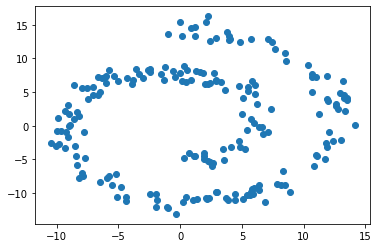

In [99]:
plt.scatter(Y[:,0],Y[:,2])

In [100]:
import importlib
import gibbs_sampling as gs



In [101]:
importlib.reload(gs)

tree = gs.SpanningTree(Y)

In [ ]:
_ = tree.runMCMC(100)
trace = tree.runMCMC(100)

In [9]:
trace_A= [-x[0]@np.diag(1-x[6])@x[0].T for x in trace]

for i in range(len(trace)):
    np.fill_diagonal(trace_A[i],0)

NameError: name 'trace' is not defined

In [10]:
trace_A[99].sum()

NameError: name 'trace_A' is not defined

In [48]:
mean_mst = np.array(trace_A).mean(0)

In [11]:
plt.imshow(mean_mst, vmin=0,vmax=1,cmap='jet')
plt.colorbar()

NameError: name 'mean_mst' is not defined

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['figure.dpi'] = 300

In [13]:
c_vec = ['lightblue']*50
# c_vec[3] = 'red'
# c_vec[2] = 'yellow'
# c_vec[4] = 'purple'


In [14]:
trace_A[99].sum()

NameError: name 'trace_A' is not defined

In [19]:
# a= trace_A[100]


# g = igraph.Graph.Adjacency((a > 0).tolist())
# g.to_undirected()

# layout = zip(list(-Y[:,0]), list(Y[:,1])) 
# out =  igraph.plot(g, layout = layout, vertex_color = c_vec)

# out.save('2moon_tree1.png')
# # out

In [20]:
# igraph.write(g, "2moon_tree1.graphml",format = "graphml")

In [21]:
# a= mean_mst


# g = igraph.Graph.Adjacency((a).tolist(),weighted=True)
# g.to_undirected()

# layout = zip(list(-Y[:,0]), list(Y[:,1])) 
# out =  igraph.plot(g, layout = layout, vertex_color = c_vec)

# # out.save('2moon_tree1.png')
# out

In [10]:
import networkx as nx

In [27]:
# Y= Y*100

In [24]:
# Y[:,0]*= 0.8

In [60]:
g_nx= nx.Graph(mean_mst)
for i in range(Y.shape[0]):
    g_nx.nodes[i].update({"viz":{"position": {"x": Y[i,0], "y": Y[i,2], "z": 0},
                                'color': {'r': 192, 'g': 192, 'b': 192, 'a': 0},
                                 'size': "4"
                                }})

# nx.draw(g_nx, pos=Y[:,[0,2]])

nx.write_gexf(g_nx, "swissroll_tree1.gexf")

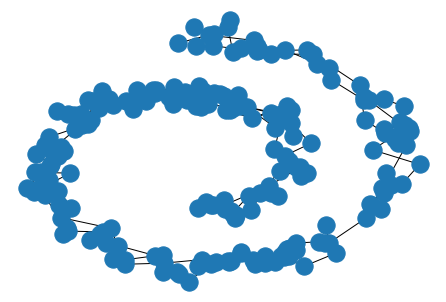

In [102]:
g_nx= nx.Graph(tree.mst0)
for i in range(Y.shape[0]):
    g_nx.nodes[i].update({"viz":{"position": {"x": Y[i,0], "y": Y[i,1], "z": Y[i,2]},
                                'color': {'r': 192, 'g': 192, 'b': 192, 'a': 0},
                                 'size': "4"
                                }})

# nx.draw(g_nx)

# nx.write_gexf(g_nx, "swissroll_tree2.gexf")

nx.draw(g_nx, pos=Y[:,[0,2]])
# nx.draw(g_nx)

In [103]:
from mayavi import mlab

In [ ]:
# G = nx.convert_node_labels_to_integers(H)
# 3d spring layout
# pos = nx.spring_layout(G, dim=3)
G = g_nx
pos = Y
# numpy array of x,y,z positions in sorted node order
xyz = np.array([pos[v] for v in sorted(G)])
# scalar colors
scalars = np.array(list(G.nodes())) + 5


mlab.figure(bgcolor=(1,1,1))
pts = mlab.points3d(
    xyz[:, 0],
    xyz[:, 1],
    xyz[:, 2],
    scalars,
    scale_factor=1,
    scale_mode="none",
#     colormap='Reds',
    colormap="Blues",
    resolution=20,
)

pts.mlab_source.dataset.lines = np.array(list(G.edges()))
tube = mlab.pipeline.tube(pts, tube_radius=0.1)
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))
mlab.show()


In [105]:
# # G = nx.convert_node_labels_to_integers(H)
# # 3d spring layout
# # pos = nx.spring_layout(G, dim=3)
# G = g_nx
# pos = Y + np.random.normal(0,1,Y.shape) * .8
# # numpy array of x,y,z positions in sorted node order
# xyz = np.array([pos[v] for v in sorted(G)])
# # scalar colors
# scalars = np.array(list(G.nodes())) + 5


# mlab.figure(bgcolor=(1,1,1))
# pts = mlab.points3d(
#     xyz[:, 0],
#     xyz[:, 1],
#     xyz[:, 2],
#     scalars,
#     scale_factor=.8,
#     scale_mode="none",
#     colormap="Blues",
#     resolution=20,
# )

# pts.mlab_source.dataset.lines = np.array(list(G.edges()))
# tube = mlab.pipeline.tube(pts, tube_radius=0.1)
# mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))
# mlab.show()
